# Midterm Exam

## Question 1

Use the data, Chinese-Names, to build a classifier to determine the gender of a name based on the bag-of-words model. 

In [33]:
import opencc
converter = opencc.OpenCC('s2t.json')
converter.convert('汉字') 

'漢字'

In [34]:
with open('../../../RepositoryData/data/ParseNames-master/Chinese_Names_Corpus/Chinese_Names_Corpus_Gender（120W）.txt', 'r') as f:
    name_gender = [l.split(',') for l in f.readlines() if len(l.split(','))==2]

In [35]:
len(name_gender)
name_gender = [(converter.convert(n),g.replace('\n','')) for (n, g) in name_gender[1:]]


In [36]:
print(name_gender[:10])
print(len(name_gender))


[('阿安', '男'), ('阿奧', '未知'), ('阿貝貝', '女'), ('阿彬', '未知'), ('阿彬彬', '男'), ('阿斌', '男'), ('阿斌斌', '男'), ('阿濱', '男'), ('阿冰', '女'), ('阿冰冰', '女')]
1163760


In [37]:
name_gender = [(n, g) for (n,g) in name_gender if g in ['男','女'] and len(n)==3]
print(len(name_gender))

915645


In [38]:
######################################
### Generate Data Sets for ENC2045 ###
######################################
with open('../../../RepositoryData/data/ParseNames-master/English_Names_Corpus/English_Cn_Name_Corpus_Gender（48W）.txt', 'r') as f:
    zh_en_gender = [l.split('|') for l in f.readlines() if len(l.split('|'))==3]
zh_en_gender[1]
#print(len(en_zh_gender))

zh_en_gender = [(converter.convert(zh), en, gender.replace('\n','')) for (zh, en, gender) in zh_en_gender]
zh_en_gender = [(z, e, g) for (z, e, g) in zh_en_gender if g in ['F','M']]
with open('../../../RepositoryData/data/_ENC2045_DATA/english_chinese_name_gender.txt', 'w') as f:
     f.writelines([zh+'|'+en+'|'+g+'\n' for (zh,en,g) in zh_en_gender])

In [39]:
######################################
### Generate Data Sets for ENC2045 ###
######################################
with open('../../../RepositoryData/data/_ENC2045_DATA/chinese_name_gender.txt', 'w') as f:
     f.writelines([n+','+g+'\n' for (n,g) in name_gender])


In [21]:
# ## convert char into pinyin
# from pypinyin import lazy_pinyin,Style 
# style = Style.TONE3

# name_pinyin=['_'.join(lazy_pinyin(n, style=style)) for n, g in name_gender]

In [22]:
# print(name_pinyin[-5:])
# print(name_gender[-5:])

In [23]:
import nltk
import numpy as np
import random

In [24]:
from collections import Counter
random.shuffle(name_gender)

print(Counter([label for (words,label) in name_gender]))

Counter({'男': 594170, '女': 321475})


In [25]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(name_gender, test_size = 0.33, random_state=42)

from collections import Counter
## Sentiment Distrubtion for Train and Test
print(Counter([label for (words, label) in train]))
print(Counter([label for (words, label) in test]))

Counter({'男': 397661, '女': 215821})
Counter({'男': 196509, '女': 105654})


In [26]:
X_train = [name for (name, gender) in train]
X_test = [name for (name, gender) in test]
y_train = [gender for (name, gender) in train]
y_test = [gender for (name, gender) in test]

In [27]:
X_train[:10]

['黃躍宏', '張兆楓', '楊鳳森', '田亞華', '何澤華', '劉院芳', '祁京梅', '張樹永', '任志民', '史寶平']

In [28]:
y_train[:10]

['男', '男', '男', '女', '男', '女', '女', '男', '男', '男']

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

In [30]:
cv = CountVectorizer(analyzer='char', 
                     ngram_range=(1,2),
                    min_df = 100)

In [31]:
X_train_bow = cv.fit_transform(X_train)
X_test_bow=cv.transform(X_test)

In [32]:
print(X_train_bow.shape)
print(X_test_bow.shape)

(613482, 2072)
(302163, 2072)


In [33]:
# get all unique words in the corpus
vocab = cv.get_feature_names()
# show document feature vectors
import pandas as pd
pd.options.display.max_colwidth = 200
X_train_bow_df = pd.DataFrame(X_train_bow.toarray(), columns=vocab)

In [34]:
X_train_bow_df.head()

,一,一凡,一鳴,丁,三,上,世,世偉,世傑,世平,...,黎明,黨,鼎,齊,齡,龍,龍飛,龍龍,龐,龔
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
%%time
from sklearn.naive_bayes import GaussianNB
model_gnb = GaussianNB()
model_gnb.fit(X_train_bow.toarray(), y_train)

CPU times: user 24.9 s, sys: 26.7 s, total: 51.6 s
Wall time: 1min 7s


GaussianNB()

In [36]:
model_gnb.predict(X_test_bow[:10].toarray())

array(['男', '女', '男', '男', '女', '男', '女', '男', '男', '女'], dtype='<U1')

In [37]:
model_gnb.score(X_test_bow.toarray(), y_test)

0.9407273557649348

In [38]:
test_name = ["陳正賢",'陳純音','張純應','陳英永']
test_name_bow = cv.transform(test_name)
model_gnb.predict(test_name_bow.toarray())

array(['男', '女', '男', '男'], dtype='<U1')

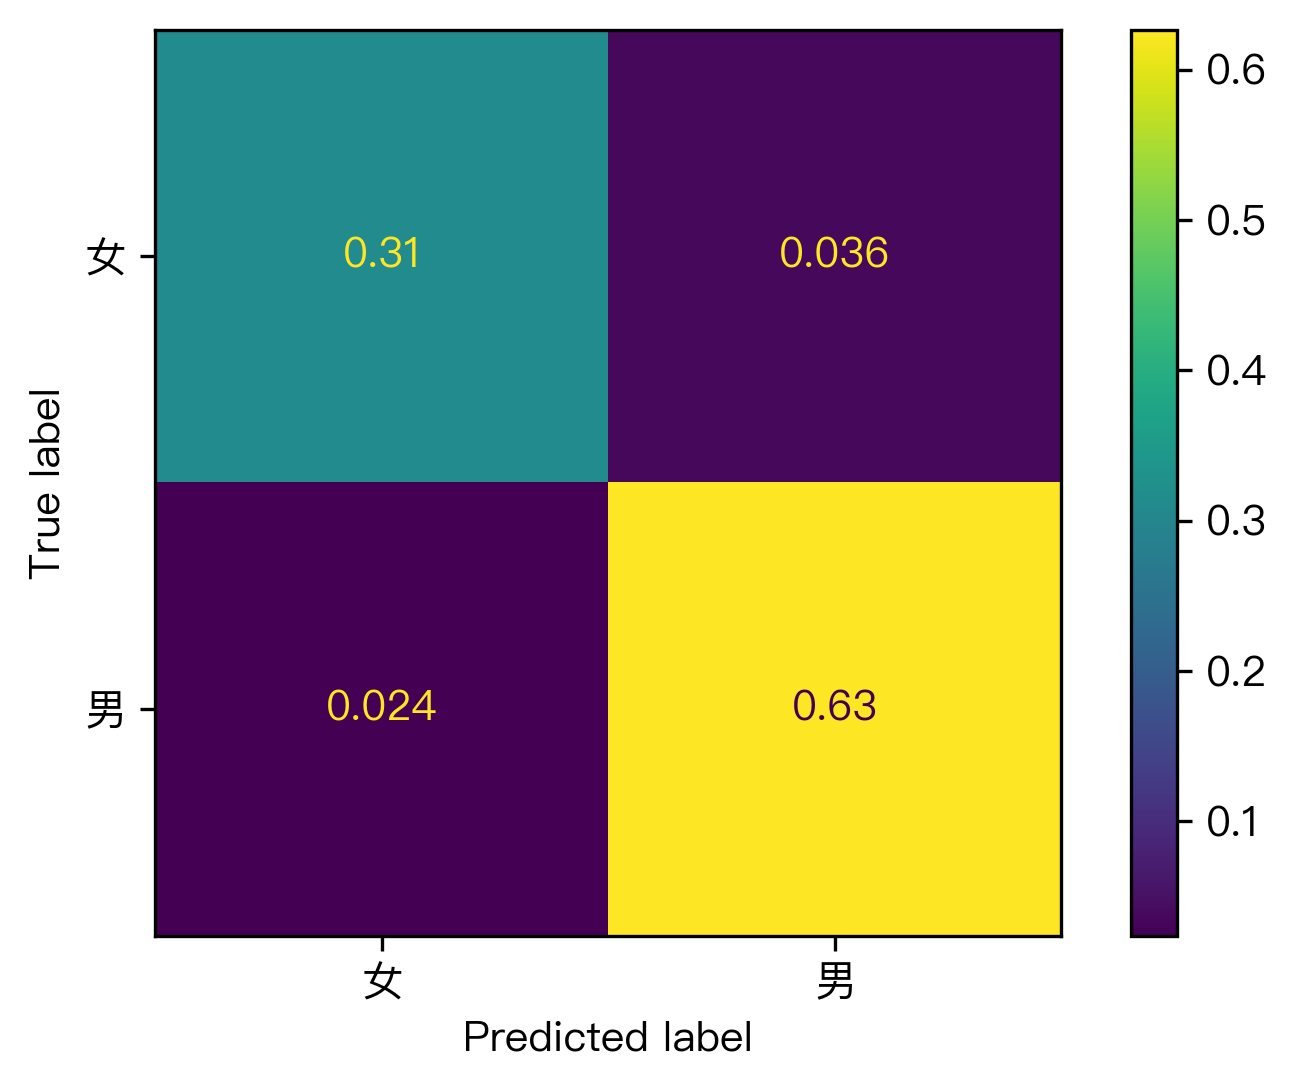

In [44]:
import matplotlib
matplotlib.rcParams['font.sans-serif']=["PingFang HK"]
matplotlib.rcParams['figure.dpi']=300
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
plot_confusion_matrix(model_gnb, X_test_bow.toarray(),y_test, normalize="all")

In [23]:
from sklearn.inspection import permutation_importance

In [24]:
%%time
importances = permutation_importance(model_gnb, X_test_bow.toarray()[:1000,], y_test[:1000])

CPU times: user 4min 25s, sys: 18.5 s, total: 4min 44s
Wall time: 4min 45s


In [25]:
## importances values: the larger, the more important.
## if shuffling a feature made the model perform worse, it means this feature was important, thus get a positive value assigned to it.

In [26]:
feature_names = cv.get_feature_names()
for i in importances.importances_mean.argsort()[::-1]:
    if importances.importances_mean[i] - 2*importances.importances_std[i] > 0:
        print(f"{feature_names[i]:<8}"
             f"{importances.importances_mean[i]:.3f}"
             f"+/-{importances.importances_std[i]:.3f}")

萍       0.015+/-0.003
麗       0.013+/-0.002
玲       0.009+/-0.001
莉       0.008+/-0.001
芳       0.007+/-0.001
娟       0.007+/-0.001
蘭       0.007+/-0.001
琴       0.007+/-0.001
潔       0.007+/-0.001
翠       0.006+/-0.001
靜       0.006+/-0.001
賽       0.006+/-0.001
珍       0.005+/-0.002
娜       0.005+/-0.001
美       0.005+/-0.001
璐       0.005+/-0.001
瓊       0.004+/-0.001
豔       0.004+/-0.001
蓮       0.004+/-0.001
香       0.004+/-0.002
瑤       0.004+/-0.001
燕       0.004+/-0.000
穎       0.004+/-0.000
霞       0.004+/-0.001
花       0.003+/-0.001
倩       0.003+/-0.001
鳳       0.003+/-0.001
月       0.003+/-0.001
丹       0.003+/-0.001
秀       0.003+/-0.001
強       0.003+/-0.001
麗娜      0.003+/-0.000
琪       0.003+/-0.001
勇       0.003+/-0.001
芸       0.003+/-0.001
風       0.003+/-0.000
巧       0.003+/-0.000
慧       0.003+/-0.001
亞       0.002+/-0.000
仙       0.002+/-0.001
芝       0.002+/-0.000
妮       0.002+/-0.001
松       0.002+/-0.000
虹       0.002+/-0.001
婷       0.002+/-0.001
國       0.